In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv')
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


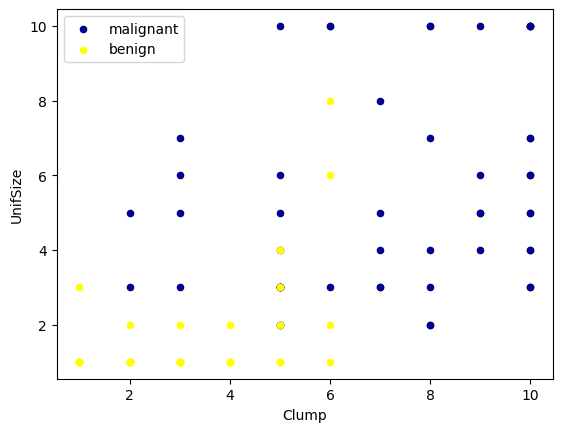

In [6]:
ax = data[data['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
data[data['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [7]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

There is a NEED to change object to int!

In [10]:
data = data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype('int')
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
feature_data = data[['Clump','UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asanyarray(feature_data)

In [13]:
y = np.asanyarray(data['Class'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (457, 9) (457,)
Test set: (226, 9) (226,)


Modeling

In [16]:
from sklearn import svm

In [17]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [19]:
yhat = clf.predict(X_test)
yhat[0:5]

array([4, 4, 2, 2, 2])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       142
           4       0.96      0.90      0.93        84

    accuracy                           0.95       226
   macro avg       0.95      0.94      0.95       226
weighted avg       0.95      0.95      0.95       226

Confusion matrix, without normalization
[[139   3]
 [  8  76]]


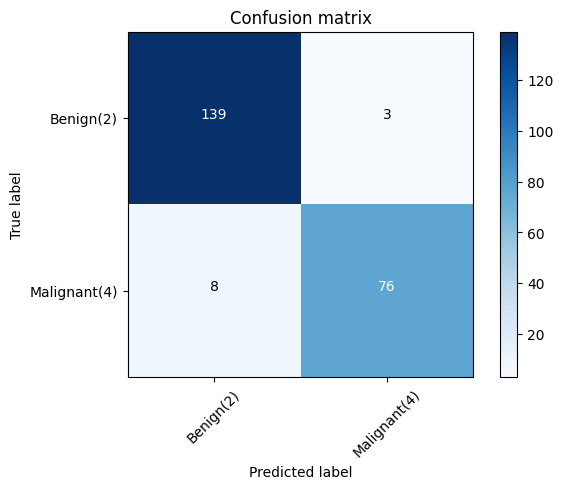

In [23]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

kernel='linear'

In [24]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 

SVC(kernel='linear')

In [25]:
yhat2 = clf2.predict(X_test)
yhat2[0:5]

array([4, 4, 2, 2, 2])

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       142
           4       0.96      0.90      0.93        84

    accuracy                           0.95       226
   macro avg       0.95      0.94      0.95       226
weighted avg       0.95      0.95      0.95       226

Confusion matrix, without normalization
[[140   2]
 [  8  76]]


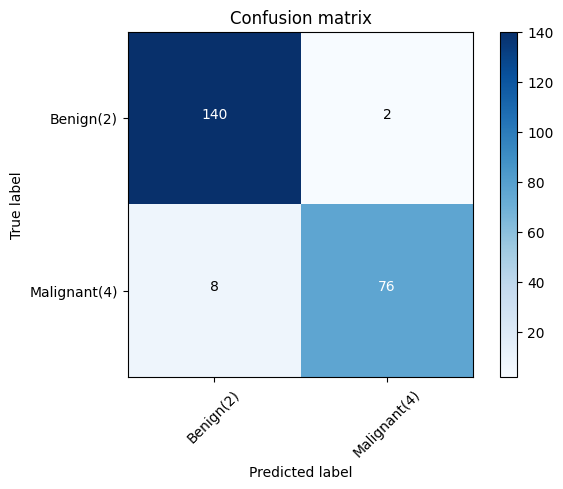

In [27]:
cnf_matrix2 = confusion_matrix(y_test, yhat2, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')